In [1]:
# !pip install matplotlib
# !pip install readmrz

In [2]:
import matplotlib.pyplot as plt
from readmrz import MrzDetector, MrzReader

In [3]:
detector = MrzDetector()
reader = MrzReader()

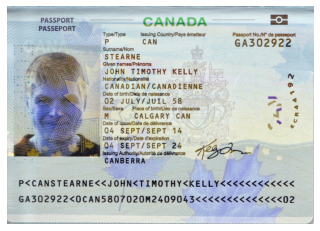

In [4]:
image = detector.read('../images/example.jpg')

plt.imshow(image)
plt.axis('off');

In [5]:
resized = detector.resize(image)

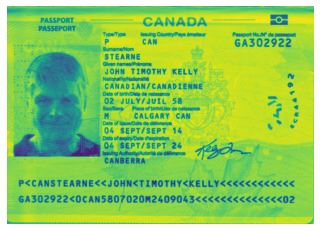

In [6]:
smoothed = detector.smooth(resized)

plt.imshow(smoothed)
plt.axis('off');

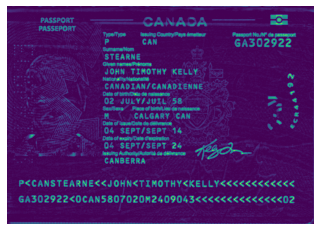

In [7]:
dark = detector.find_dark_regions(smoothed)

plt.imshow(dark)
plt.axis('off');

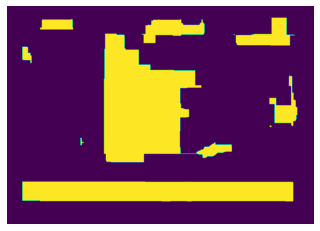

In [8]:
thresh = detector.apply_threshold(dark)

plt.imshow(thresh)
plt.axis('off');

In [9]:
y, y1, x, x1 = detector.find_coordinates(thresh, smoothed)
print(y, y1, x, x1)

467 564 19 821


In [10]:
w = x1 - x
h = y1 - y

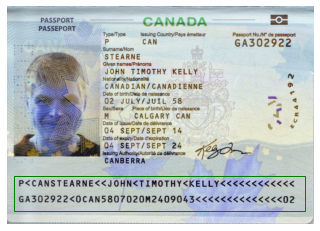

In [11]:
fig, ax = plt.subplots()
ax.imshow(resized)

rect = plt.Rectangle((x, y), w, h, linewidth=1, edgecolor='g', facecolor='none')
ax.add_patch(rect)

plt.axis('off');
plt.show();

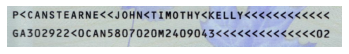

In [12]:
plt.imshow(resized[y:y1, x:x1])
plt.axis('off');

In [13]:
code = reader.read_mrz(resized[y:y1, x:x1])
print(code)

P<CANSTEARNE<<JOHN<TIMOTHY<KELLY<<<<<<<<<<<<
GA302922<0CAN5807020M2409043<<<<<<<<<<<<<<02


In [14]:
reader.get_fields(code)

{'surname': 'STEARNE',
 'name': 'JOHN TIMOTHY KELLY',
 'country': 'CAN',
 'nationality': 'CAN',
 'birth_date': '580702',
 'expiry_date': '240904',
 'sex': 'M',
 'document_type': 'P',
 'document_number': 'GA302922',
 'optional_data': '',
 'birth_date_hash': '0',
 'expiry_date_hash': '3',
 'document_number_hash': '0',
 'final_hash': '2'}